<a href="https://colab.research.google.com/github/Suchirapon/data_viz/blob/main/Visualize_Data_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive #เชื่อมต่อ google.colab กับ drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os #ทำงานเกี่ยวกับการจัดการไฟล์ 
path = '/content/drive/My Drive/dataviz_2021_data'

In [3]:
search_df = os.path.join(path,'search_request.csv')

In [4]:
data = pd.read_csv(search_df) 
data.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534


# เตรียมข้อมูล

### แปลงข้อมูลบอกเวลาให้เป็นตัวแปรชนิด datetime

In [5]:
from datetime import datetime,time as dt

In [6]:
data['search_timestamp']  = pd.to_datetime(data['search_timestamp'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

# Bar Chart (กราฟแท่ง)

### สร้างกราฟแท่งเปรียบเทียบปริมาณ คนเข้าใช้ web Wongnai.com เพื่อคนหาร้านอาหาร ในแต่ละวัน 

quiz 6

In [7]:
 from matplotlib import pyplot as plt

### ส่วนประกอบกราฟแท่ง

- ตัวกราฟแท่ง (height)
- ตำแหน่งกราฟแท่ง (X)
- ชื่อแท่ง (tick_label)
- ชื่อกราฟ (plt.title)
- ชื่อแกน x (plt.xlabel)
- ชื่อแกน y (plt.ylabel)

### การแสดงภาษาไทยในกราฟ 
- https://medium.com/@kanyawee.work/%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%82%E0%B8%AD%E0%B8%87-matplotlib-%E0%B8%9A%E0%B8%99-google-colab-37210d9a9f31

In [8]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [9]:
import matplotlib as mpl 
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

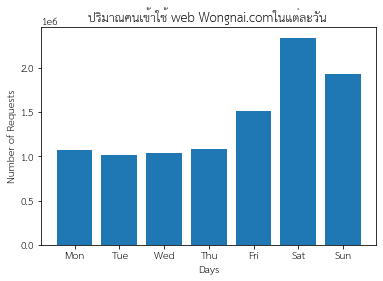

In [10]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                                data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                                data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                                data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                                data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                                data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                                data[data['search_timestamp'].dt.dayofweek == 6].shape[0],
                                ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')
plt.title('ปริมาณคนเข้าใช้ web Wongnai.comในแต่ละวัน ');

# Grouped bar chart

### แสดงปริมาณคนเข้า web ในแต่ละวัน โดยเปรียบเทียบช่วงเวลา 11.00 - 12.00 กับ 23.00 - 24.00 

In [11]:
from datetime import datetime as dt
from datetime import time

In [12]:
data[(data['search_timestamp'].dt.dayofweek == 0) 
& (data['search_timestamp'].dt.time < time(hour=12)) 
& (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]  # monday 11:00-12:00

73249

In [13]:
b4lunch = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
                         ]

In [14]:
b4lunch

[73249, 73083, 75429, 78024, 99007, 174165, 165440]

In [15]:
data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]

31874

In [16]:
b4midnight = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
                         ]
b4midnight

[31874, 32258, 31153, 35944, 53174, 58306, 35801]

In [17]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [18]:
import numpy as np

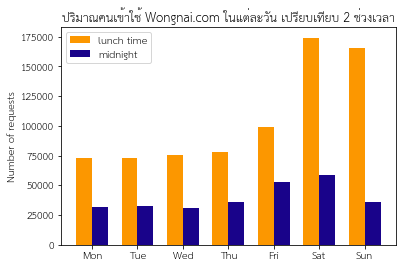

In [19]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, b4lunch, width, label='lunch time',color = '#fc9700') #SCML Color
rects2 = ax.bar(x + width/2, b4midnight, width, label='midnight',color = '#19038a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

# Stacked bar chart

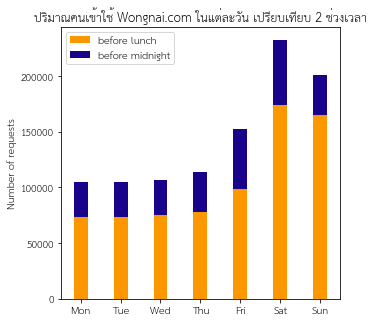

In [80]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, b4lunch, width,  label='before lunch',color = '#fc9700')
ax.bar(labels, b4midnight, width,  bottom = b4lunch, label='before midnight',color = '#19038a')
# bottom = b4lunch คือ ให้เริ่มที่ b4lunch
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.legend()

plt.show()

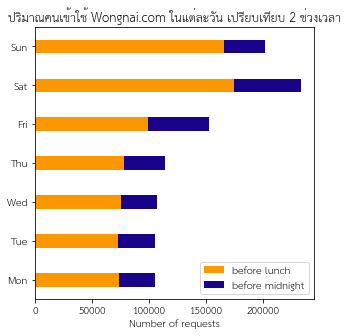

In [81]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels,  b4lunch,width,  label='before lunch',color = '#fc9700')
ax.barh(labels, b4midnight, width,  left = b4lunch, label='before midnight',color = '#19038a')
# bottom = b4lunch คือ ให้เริ่มที่ b4lunch
ax.set_xlabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.legend()

plt.show()

## เช็คชื่อ โดยให้วาด Bar Chart ที่เปรียบเทียบปริมาณคนใช้งาน Wongnai . com สองช่วงเวลา โดยให้กราฟแสดงสัดส่วนของปริมาณคนใช้งานแต่ละวันด้วย

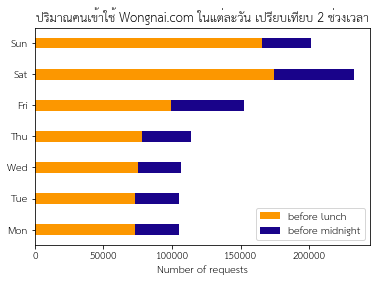

In [ ]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, b4lunch, width,  label='before lunch',color = '#fc9700')
ax.barh(labels, b4midnight, width,  left = b4lunch, label='before midnight',color = '#19038a')
# bottom = b4lunch คือ ให้เริ่มที่ b4lunch
ax.set_xlabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.legend()

plt.show()

# Histogram : กราฟแสดงความถี่ของข้อมูล

นับความถี่ข้อมูลแล้วเอามา plot

In [ ]:
#np.random.randn(100) # จะแรนด้อม ที่ mu = 0 std = 1
# randn(100) random 100 จุด

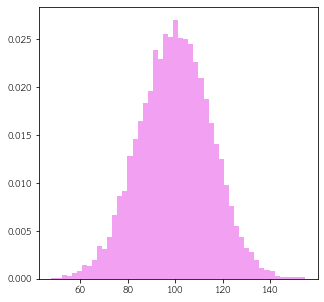

In [84]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(2021)

mu, sigma = 100, 15
X = mu + sigma * np.random.randn(10000)

plt.hist(X, 50, density = True, facecolor = 'violet', alpha = 0.75);

In [78]:
output
# นับจำนวนสมาชิก เริ่มตั้ง 40.88463603 - 52.13062451 มีสามชิกทั้งหมด 13 ตัว

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([1.42831764e+08, 1.42831765e+08, 1.42831765e+08, 1.42831765e+08,
        1.42831765e+08, 1.42831765e+08, 1.42831765e+08, 1.42831765e+08,
        1.42831765e+08, 1.42831765e+08, 1.42831766e+08]),
 <a list of 10 Patch objects>)

# Plot Histogram 

In [86]:
data['number_of_result']

0           18
1           10
2            8
3           12
4           14
            ..
10004352    22
10004353    22
10004354    22
10004355    22
10004356    22
Name: number_of_result, Length: 10004356, dtype: object

In [87]:
data[data['number_of_result']=='number_of_result']


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long


In [88]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[10,10]
Y = plt.hist(list(data['number_of_result'].drop(1000016)),20)

KeyError: ignored

### แก้ไข แกน x ที่เรียงข้อมูลผิด

In [89]:
data.dtypes

Unnamed: 0                   int64
search_id                   object
search_timestamp    datetime64[ns]
user_agent                  object
q                           object
user_id                    float64
session_id                  object
number_of_result            object
lat                         object
long                        object
dtype: object

### เรียกดู data type ของตัวแปร

In [90]:
type(data['number_of_result'][0])

int

### ตรวจสอบ data type ของตัวแปร

In [91]:
type(data['number_of_result'][0]) == int

True

### ตรวจสอบดูทุกๆค่า ใน colum 'number_of_result'

In [ ]:
#for z in data['number_of_result'] :
  #if type(x) != int:
   # print(f'{x} -> {type(x)}')

In [ ]:
new_type = data['number_of_result'].astype('int32')

### ลบ record ที่มีค่า ในคอลัม 'number_of_result' เป็น number_of_result

In [38]:
data[data['number_of_result']=='number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
1000016,1000032,search_id,NaT,user_agent,original_q,228667.0,session_id,number_of_result,lat,long


In [ ]:
data = data.drop(1000016) # drop ทิ้ง

In [93]:
data[data['number_of_result']=='number_of_result'] # เช็คว่ายังมีอยู่หรือไม่

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long


In [94]:
new_type = data['number_of_result'].astype('int32')

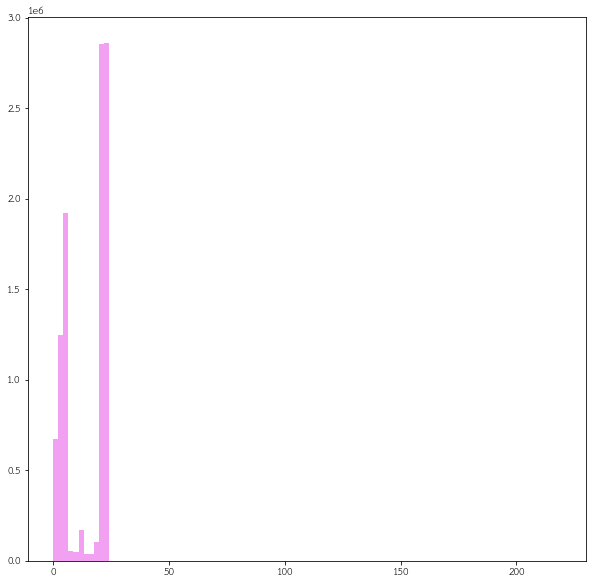

In [95]:
output = plt.hist(new_type, 100,  facecolor='violet', alpha=0.75); #ทำให้เลขในแนวแกน x เรียงได้

### ลบ outlier

In [96]:
new_type_nooutlier = new_type[new_type < 25]

In [97]:
new_type.shape[0] - new_type_nooutlier.shape[0]

14

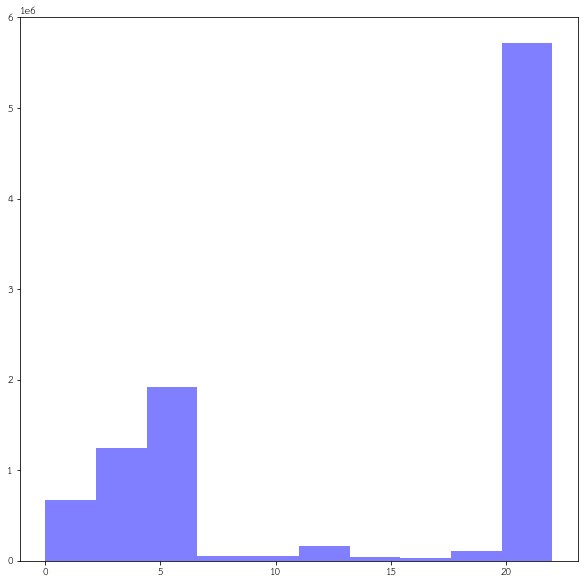

In [98]:
matplotlib.rcParams['figure.figsize']=[10,10]
output = plt.hist(new_type_nooutlier, 10,  facecolor='blue', alpha=0.5);

ข้อมูลผลการค้นหาส่วนมาก มากกว่า 20 

## Quiz7 เปรียบเทียบความถี่ของแท่งที่มีค่ามากที่สุด กับ แท่งอื่นๆ รวมกัน

In [ ]:
new_type_nooutlier_sum = new_type_nooutlier.sum[new_type_nooutlier<20]

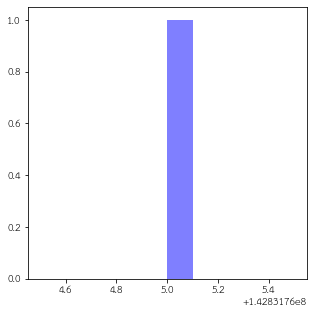

In [61]:
matplotlib.rcParams['figure.figsize']=[5,5]
output = plt.hist(new_type_nooutlier_sum, 10,  facecolor='blue', alpha=0.5);

## เฉลย Quiz

In [99]:
output

(array([ 670293., 1247269., 1921441.,   51703.,   50609.,  167502.,
          36883.,   35914.,  105490., 5717238.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

In [100]:
output[0][-1]

5717238.0

In [101]:
sum(output[0][:-1])

4287104.0

# Treemap

ทุกๆปริมาณจะถูกแทนด้วยพื้นที่

In [69]:
!pip install squarify

In [71]:
import matplotlib.pyplot as plt
import squarify # pip install squarify
import numpy as np

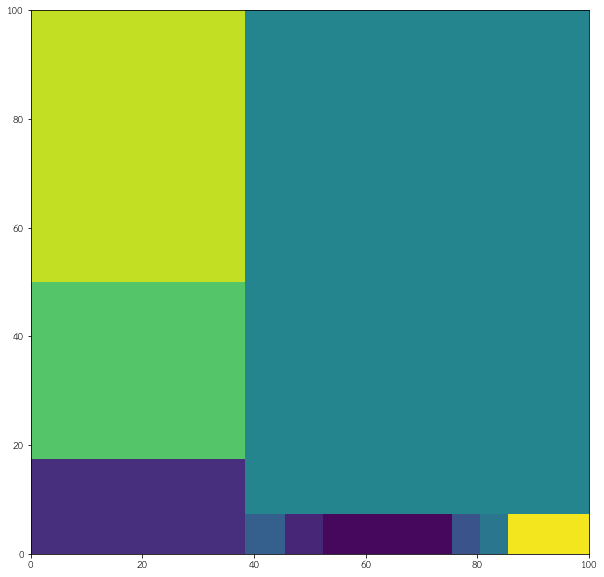

In [102]:
squarify.plot(output[0])

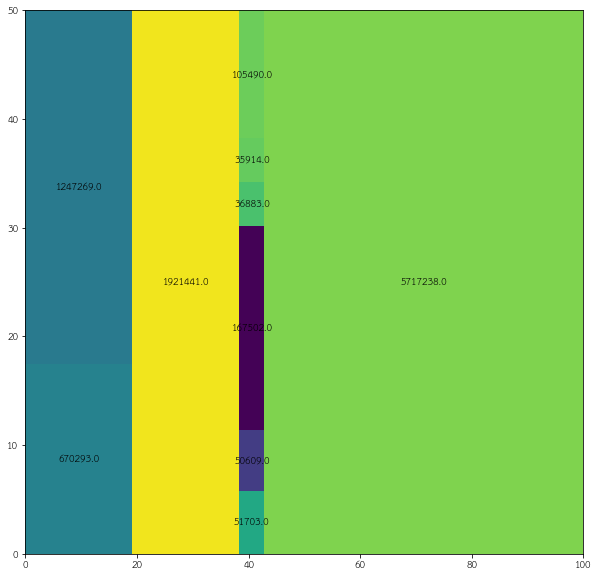

In [105]:
squarify.plot(output[0],value=output[0],norm_y=50)

# Radar chart

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi # มาเนื่องจากเกี่ยวกับวงกลมนำมาใช้เพื่อดึงค่าพาย

In [115]:
data = {​​ 'client_id' : ['c1' , 'c2' , 'c3' , 'c4'],'cheese' : [2,5,4,3], 'beer' : [2,1,3,5],'chicken' : [5,3,3,4],'bread' : [4,3,2,1],  'coffee' : [2,3,5,3]}
​​df = pd.DataFrame.from_dict(data)
df

SyntaxError: ignored